In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
# グラフや画像の描画するやつ
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.1-dlenv_tfe


In [8]:
# データセットのロード
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

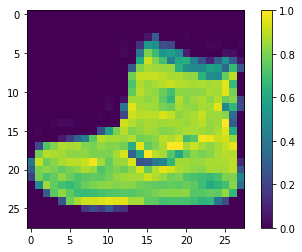

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
# 画像を0,1にスケーリング
train_images = train_images / 255.0
test_images = test_images / 255.0

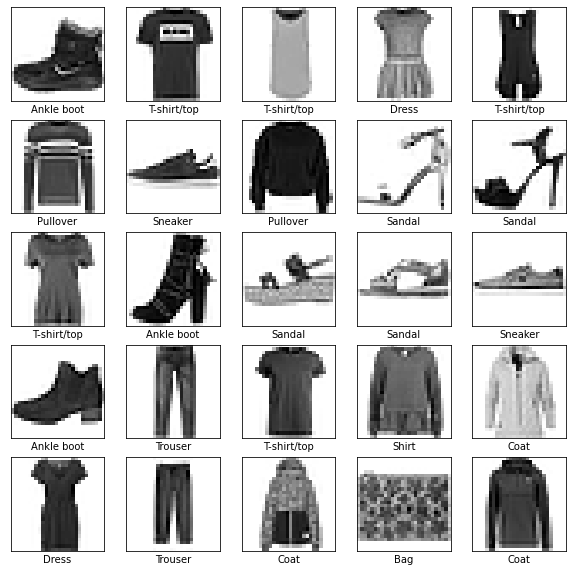

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [24]:
# モデルの構築
model = keras.Sequential([
    # 28 x 28 = 784ピクセルの1次元配列に変換
    keras.layers.Flatten(input_shape=(28, 28)),
    # ニューロンの層を作成
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
# モデルのコンパイル
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.4932 - accuracy: 0.8255
Epoch 2/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3758 - accuracy: 0.8640
Epoch 3/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.3348 - accuracy: 0.8779
Epoch 4/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3126 - accuracy: 0.8847
Epoch 5/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.2942 - accuracy: 0.8907


In [27]:
# 正解率の評価
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3439 - accuracy: 0.8737

Test accuracy: 0.8737


In [28]:
# 画像の分類予測
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([2.5713338e-05, 2.1611856e-06, 2.6240339e-06, 4.6533028e-06,
       3.0417661e-07, 4.0036375e-03, 6.5331724e-06, 6.7965999e-02,
       1.3777305e-05, 9.2797446e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
# 10チャンネルを全てグラフ化
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

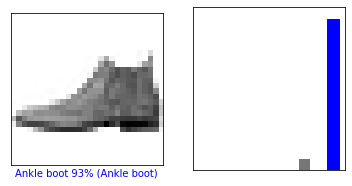

In [39]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

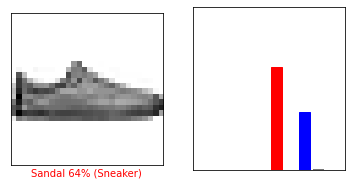

In [40]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

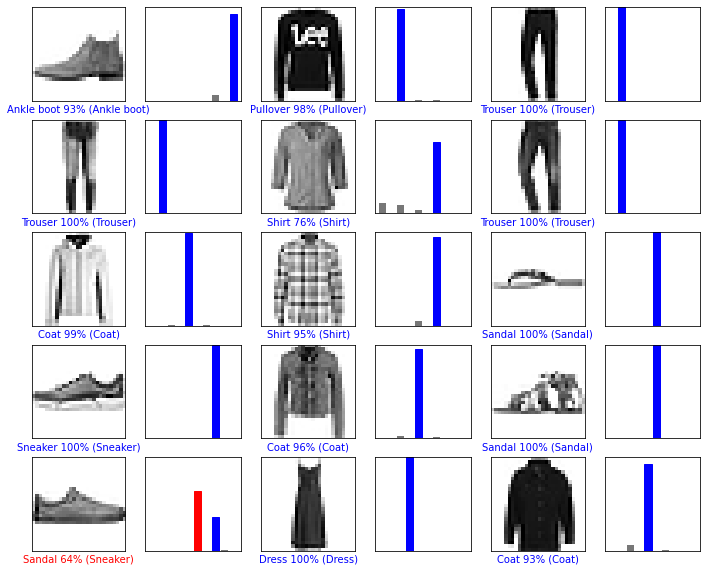

In [41]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [57]:
# １枚の画像に対する予測

# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


In [58]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [59]:
# 予測
predictions_single = model.predict(img)
print(predictions_single)

[[2.5713311e-05 2.1611816e-06 2.6240289e-06 4.6533023e-06 3.0417658e-07
  4.0036375e-03 6.5331719e-06 6.7966059e-02 1.3777304e-05 9.2797440e-01]]


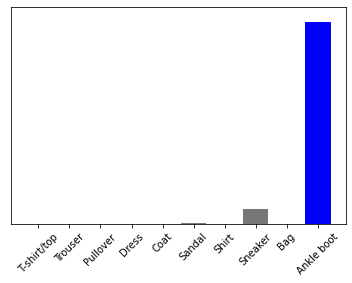

In [60]:
# 予測結果
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [56]:
np.argmax(predictions_single[0])

1